# Comparison for WIMpy_NREFT

This is an example file to go with the `WIMpy_NREFT` code, available [here](https://github.com/bradkav/WIMpy_NREFT). The main functions are in `DMUtils.py`, which is loaded like this:

In [1]:
import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as pl
from Wfunctions import WM

### Loading nuclear form factors

We load the NREFT form factor coefficients for the nucleus we're interested in (say Iodine for now) as follows. The form factor coefficients (`FF_I` in this case) are required to calculate the recoil rate.

In [2]:
A_I = 19 #Nucleon number
Z_I = 9 #Atomic number
root = "FormFactors" #Folder where the form factor files are stored
FF_I = DMU.LoadFormFactors(root, A_I, Z_I)

 Loading Form Factor for (A, Z) = (19, 9)...


### Differential recoil rate

Before we calculate the differential recoil rate $\mathrm{d}R/\mathrm{d}E_R$, we have to specify the couplings. We do this by defining two vectors of couplings: 1 for the couplings to protons and 1 for the couplings to neutrons. Each vector should have 11 elements (one entry for each of the 11 NREFT operators - note that $\mathcal{O}_2$ is set to zero by default, but we keep 11 entries so that the numbering matches): 

In [3]:
#Initialise the empty vectors
cp = np.zeros(11)
cn = np.zeros(11)

Let's start with the standard spin-independent interaction (so we want to set the first element $\mathcal{O}_1$, noting that the numbers of arrays starts from zero in python):

In [4]:
cp[0] = 1.0
cn[0] = 1.0
print("Couplings to protons [GeV^{-2}]:", cp)
print("Couplings to neutrons [GeV^{-2}]:", cn)

('Couplings to protons [GeV^{-2}]:', array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
('Couplings to neutrons [GeV^{-2}]:', array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))


0.0397887348799


**Note that the couplings in the NREFT are *dimensionful* and should have units of GeV$^{-2}$**.

Now let's calculate the differential spectrum for a DM particle of mass 100 GeV:

In [6]:
m_x = 100 #DM mass in GeV

E_list = np.linspace(0, 100, 1000)
R_list_SI = E_list*0.0
R_list_SI_old = E_list*0.0
for i, E in enumerate(E_list):
    R_list_SI[i] = (4*np.pi/(2*(0.5)+1))*DMU.dRdE_NREFT(E, A_I, m_x, cp, cn, "Fluorine") 
    R_list_SI_old[i] = DMU.dRdE_NREFT_old(E, A_I, m_x, cp, cn, FF_I) 

Now let's plot the result, which will be in units of keV$^{-1}$ kg$^{-1}$ day$^{-1}$:

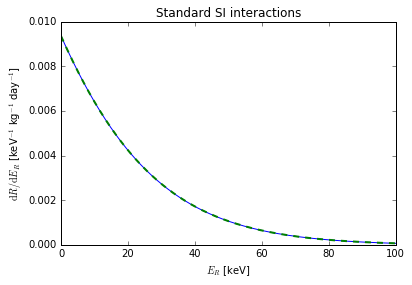

In [9]:
#print R_list_SI_old

pl.figure()
pl.plot(E_list, R_list_SI)
pl.plot(E_list, R_list_SI_old, 'g--', lw=2.0)
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.title('Standard SI interactions')
pl.show()

Now let's try something more exotic. Let's just take some random values for all the couplings to protons and neutrons (setting the couplings to $\mathcal{O}_1$ to zero):

In [23]:
cp_random = np.random.randn(11)
cn_random = np.random.randn(11)
cp_random[0] = 0
cn_random[0] = 0
print("Couplings to protons [GeV^{-2}]:", cp_random)
print("Couplings to neutrons [GeV^{-2}]:", cn_random)

('Couplings to protons [GeV^{-2}]:', array([ 0.        , -0.72545881,  0.46289966, -1.09645846,  1.25408537,
        0.75543287,  2.17033873,  0.11930348,  0.1865487 , -2.07895842,
        1.8872089 ]))
('Couplings to neutrons [GeV^{-2}]:', array([ 0.        , -0.92501569,  1.08618659,  0.35564461, -0.94843562,
        0.33956829, -2.54941518, -0.56406249, -0.83172787,  0.18929178,
        0.64395191]))


Then let's calculate and plot again:

In [24]:
E_list = np.linspace(0, 100, 1000)
R_list_random = E_list*0.0
R_list_random_old = E_list*0.0
for i, E in enumerate(E_list):
    R_list_random[i] = (4*np.pi/(2*(0.5)+1))*DMU.dRdE_NREFT(E, A_I, m_x, cp_random, cn_random,"Fluorine") 
    R_list_random_old[i] = DMU.dRdE_NREFT_old(E, A_I, m_x, cp_random, cn_random, FF_I) 

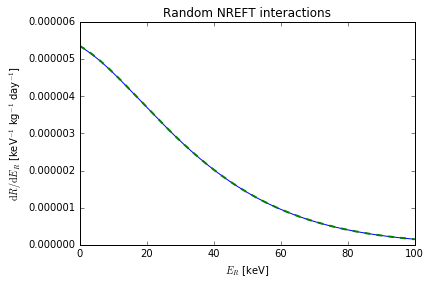

In [25]:
pl.figure()
pl.plot(E_list, R_list_random)
pl.plot(E_list, R_list_random_old,'g--', lw=2.0)
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.title('Random NREFT interactions')
pl.show()

### Event Rates

You can also calculate the total number of events, using `Nevents_NREFT`. You have to specify a minimum and maximum energy, and you can also specify an efficiency function (i.e. the efficiency of the detector as a function of recoil energy) which multiplies the recoil rate:

In [14]:
Emin = 5 #keV
Emax = 50 #keV

#Just some made-up efficiency function
def efficiency(E_R):
    return 0.5/(1 + np.exp(-E_R))



In [15]:
print("Number of signal events per day per kg of target mass:")
print(DMU.Nevents_NREFT(Emin, Emax, A_I, m_x, cp_random, cn_random, FF_I, eff=efficiency))

Number of signal events per day per kg of target mass:
1.95125821474e-05
